In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
import os
from datetime import datetime

file_path = 'Relavamiento estimación ágil (respuestas) - Respuestas de formulario 1.csv'
data = pd.read_csv(file_path)

data.head()


,Marca temporal,Dirección de correo electrónico,"Presto mi consentimiento para la recolección de datos personales necesarios para la realización de la encuesta, de acuerdo con mis derechos reconocidos en la ley 25.326 de Protección de Datos Personales.",Nombre de la empresa/organización a la que pertenece:,¿Qué rol ocupa dentro de la organización donde trabaja actualmente?,¿Cuántos años de experiencia tiene en desarrollo de software?,Indique su modalidad de trabajo actual,¿De qué tamaño es la empresa/organización donde trabaja?,¿En dónde se encuentra ubicada la empresa donde trabaja?,¿Trabaja con un enfoque ágil de desarrollo de software?,...,"En caso de que realicen seguimiento, ¿qué métricas utilizan para evaluar la precisión de las estimaciones? (Seleccione todas las opciones que apliquen)",¿Qué tan precisas considera que son las estimaciones de su equipo?,¿Considera que las técnicas y prácticas actuales de estimación utilizadas por su equipo son efectivas y precisas?,¿Con qué frecuencia encuentra inexactitudes en las estimaciones?,Desde que comenzó a trabajar con su equipo actual ¿Considera que la precisión de las estimaciones ha mejorado con el tiempo?,¿Considera que la implementación de nuevas técnicas de estimación ágil podría mejorar la eficiencia de los proyectos en su empresa?,"Si utiliza una herramienta para registrar las estimaciones, ¿Qué tan útil la considera?",¿Existen inconvenientes o caracteristicas de la herramienta donde registra estimaciones que no le guste o considere contra-producente? -,¿Cuáles considera que son los principales factores internos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen),¿Cuáles considera que son los principales factores externos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen)
0,29/09/2024 12:57:16,luisgonzalocao@gmail.com,Sí,--,Desarrollador Frontend/Backend,Entre 3 y 5 años,Remoto,Grande - más de DOSCIENTOS (200) trabajadores,Buenos Aires,Si,...,Frecuencia de cumplimiento de las estimaciones,4.0,Efectivas,2.0,Sí,Si,5.0,NaN,Ninguna de las anteriores,Ninguna de las anteriores
1,2/10/2024 11:36:38,pedroalegre29@gmail.com,Sí,42 Mate,Desarrollador Frontend/Backend,Entre 3 y 5 años,Remoto,Pequeña - hasta CINCUENTA (50) trabajadores,Chaco,Si,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/10/2024 14:13:44,ballestafranco@gmail.com,Sí,Banco de corrientes,Desarrollador de core,Menos de 1 año,Presencial,Mediana - de CINCUENTA Y UN (51) a DOSCIENTOS ...,Corrientes,No,...,Variación entre estimación y tiempo real,2.0,Poco efectivas,4.0,No,Si,NaN,"Para comenzar, directamente mi equipo no parti...","Complejidad del proyecto, Alcance del proyecto...","Cambios en los requisitos, Presión del cliente..."
3,3/10/2024 11:39:42,marygabyhhh@gmail.com,Sí,"""-""",Analista QA (Tester),Más de 5 años,Híbrido (trabajar remoto y en oficina),Grande - más de DOSCIENTOS (200) trabajadores,Chaco,Si,...,Frecuencia de cumplimiento de las estimaciones,4.0,Efectivas,2.0,Sí,Si,5.0,No,"Variabilidad en la experiencia del equipo, Com...",Ninguna de las anteriores
4,3/10/2024 16:14:59,francoenzo1999@hotmail.com,Sí,Banco del sol,Desarrollador Frontend/Backend,Entre 1 y 3 años,Remoto,Mediana - de CINCUENTA Y UN (51) a DOSCIENTOS ...,Buenos Aires,No,...,"Variación entre estimación y tiempo real, Núme...",3.0,Efectivas,2.0,No estoy seguro,Si,3.0,NaN,"Complejidad del proyecto, Alcance del proyecto...",Cambios en los requisitos


In [ ]:
data = data.drop(columns=["Marca temporal", "Dirección de correo electrónico",
                        "Presto mi consentimiento para la recolección de datos personales necesarios para la realización de la encuesta, de acuerdo con mis derechos reconocidos en la ley 25.326 de Protección de Datos Personales.", "Nombre de la empresa/organización a la que pertenece:"])


data.fillna("No especificado", inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 44 columns):
 #   Column                                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                                               --------------  ----- 
 0   ¿Qué rol ocupa dentro de la organización donde trabaja actualmente?                                                                                                  42 non-null     object
 1   ¿Cuántos años de experiencia tiene en desarrollo de software?                                                                                                        42 non-null     object
 2   Indique su modalidad de trabajo actual                                                                                  

C:\Users\chuch\AppData\Local\Temp\ipykernel_14724\2087512039.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No especificado' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("No especificado", inplace=True)


<div style="font-size: 40px; font-family: Verdana;">
    BLOQUE 1
</div>
</br>
</br>
<div style="font-size: 20px; font-family: Verdana;">
    Ambas columnas tienen multiples valores como resultado de la encuesta
</div>

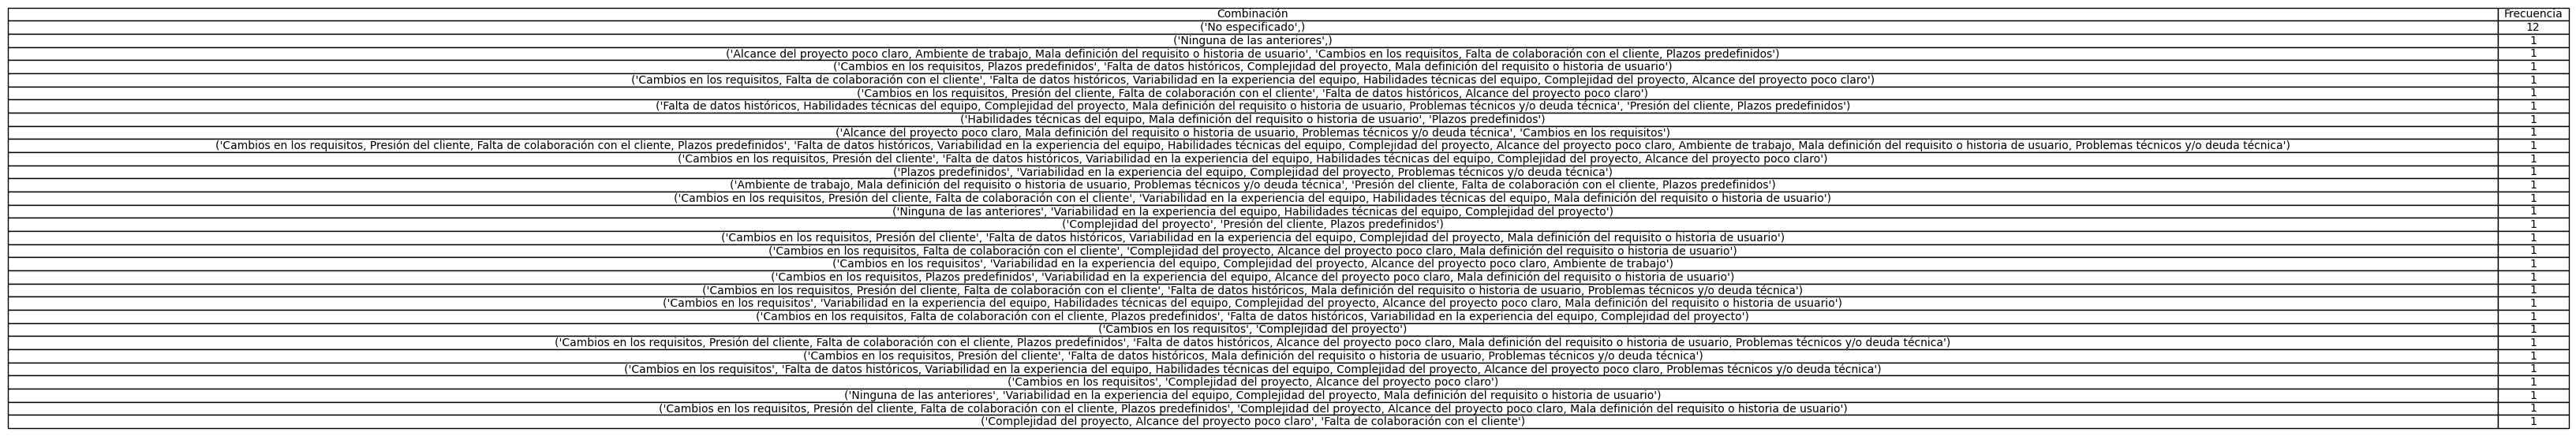

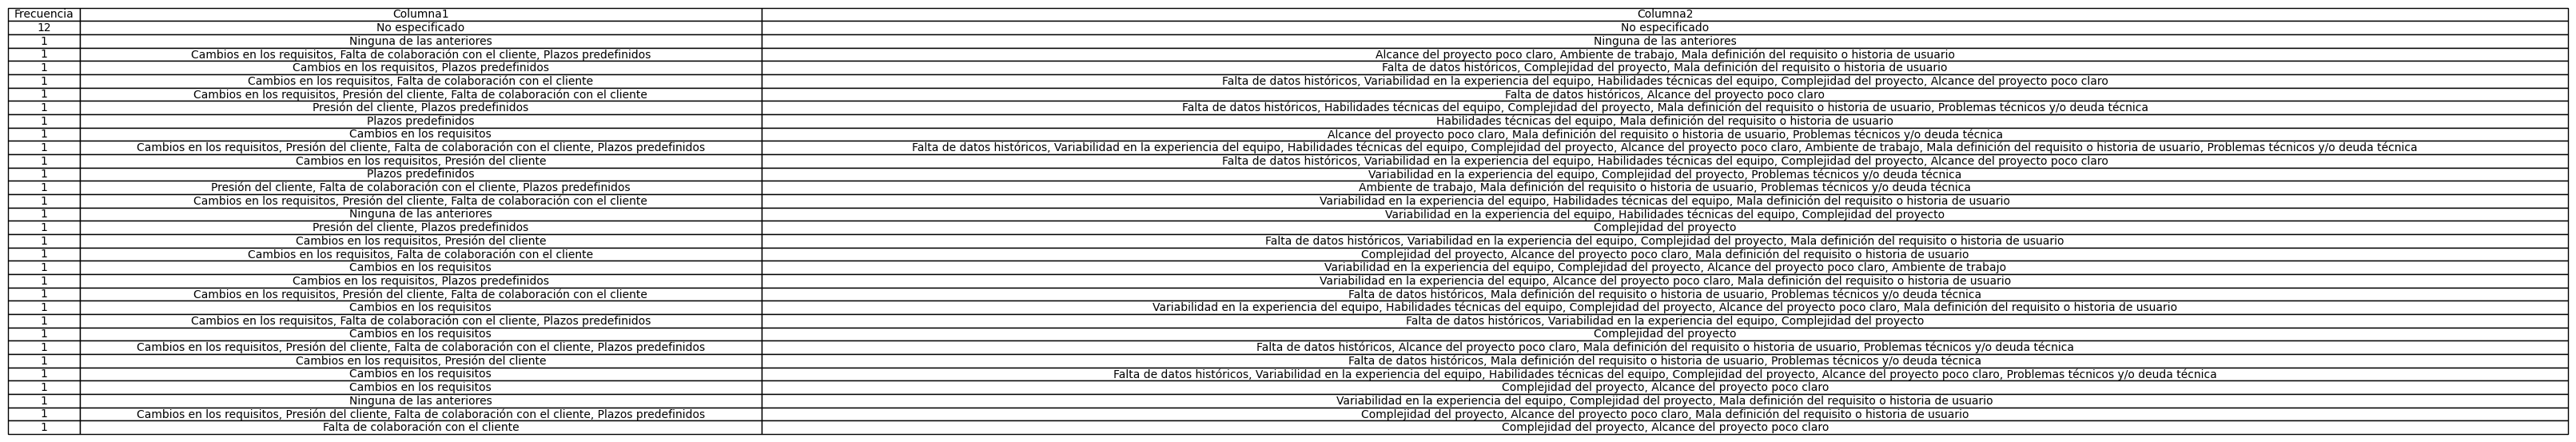

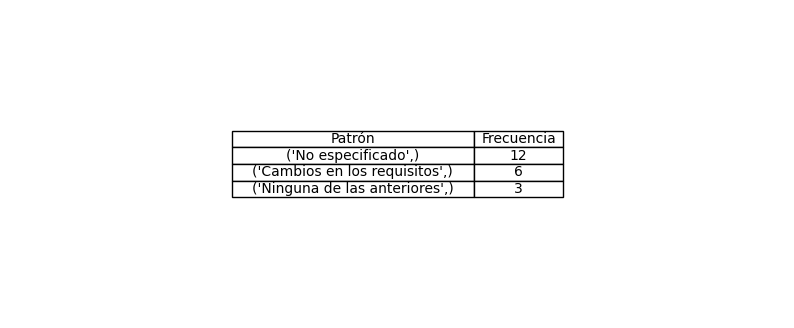

In [ ]:
output_dir1 = "resultadosbloque1"
os.makedirs(output_dir1, exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")


columna1 = '¿Cuáles considera que son los principales factores externos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen)'
columna2 = '¿Cuáles considera que son los principales factores internos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen)'


data['Respuestas_Multiples_Col1'] = data[columna1].str.split(';')
data['Respuestas_Multiples_Col2'] = data[columna2].str.split(';')


data['Combinaciones'] = data.apply(
    lambda row: tuple(sorted(set(row['Respuestas_Multiples_Col1'] or []) | set(row['Respuestas_Multiples_Col2'] or []))),
    axis=1
)


combinaciones_mult = Counter(data['Combinaciones'].dropna())


df_combinaciones = pd.DataFrame(combinaciones_mult.items(), columns=['Combinación', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)


interacciones = []
for col1_respuestas, col2_respuestas in zip(data['Respuestas_Multiples_Col1'], data['Respuestas_Multiples_Col2']):
    for respuesta1 in col1_respuestas or []:
        for respuesta2 in col2_respuestas or []:
            interacciones.append((respuesta1.strip(), respuesta2.strip()))


interacciones_contadas = Counter(interacciones)


df_interacciones = pd.DataFrame(interacciones_contadas.items(), columns=['Interacción', 'Frecuencia'])
df_interacciones[['Columna1', 'Columna2']] = pd.DataFrame(df_interacciones['Interacción'].tolist(), index=df_interacciones.index)
df_interacciones = df_interacciones.drop(columns=['Interacción']).sort_values(by='Frecuencia', ascending=False)


subconjuntos = []
for respuestas in data['Combinaciones']:
    if len(respuestas) >= 1:  
        subconjuntos.extend(combinations(sorted(set(respuestas)), 1))


subconjuntos_contados = Counter(subconjuntos)


df_subconjuntos = pd.DataFrame(
    subconjuntos_contados.most_common(3),
    columns=['Patrón', 'Frecuencia']
)


if not df_combinaciones.empty:
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(
        cellText=df_combinaciones.values,
        colLabels=df_combinaciones.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_combinaciones.columns))))
    #plt.title("Combinaciones de respuestas múltiples más comunes")
    plt.show()
    df_combinaciones.to_excel(os.path.join(output_dir1, f"combinaciones_frecuentes_{timestamp}.xlsx"), index=False)


if not df_interacciones.empty:
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(
        cellText=df_interacciones.values,
        colLabels=df_interacciones.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_interacciones.columns))))
    #plt.title("Interacciones entre respuestas de columna 1 y columna 2")
    plt.show()
    df_interacciones.to_excel(os.path.join(output_dir1, f"interacciones_frecuentes_{timestamp}.xlsx"), index=False)


if not df_subconjuntos.empty:
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(
        cellText=df_subconjuntos.values,
        colLabels=df_subconjuntos.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_subconjuntos.columns))))
    #plt.title("Patrones más frecuentes de respuestas múltiples")
    plt.show()
    df_subconjuntos.to_excel(os.path.join(output_dir1, f"patrones_frecuentes_{timestamp}.xlsx"), index=False)
else:
    print("No se encontraron patrones frecuentes con al menos 3 elementos.")



<div style="font-size: 40px; font-family: Verdana;">
    BLOQUE 2
</div>
</br>
</br>
<div style="font-size: 20px; font-family: Verdana;">
    Solo la columna 2 tiene multiplos valores como resultado de la encuesta
</div>

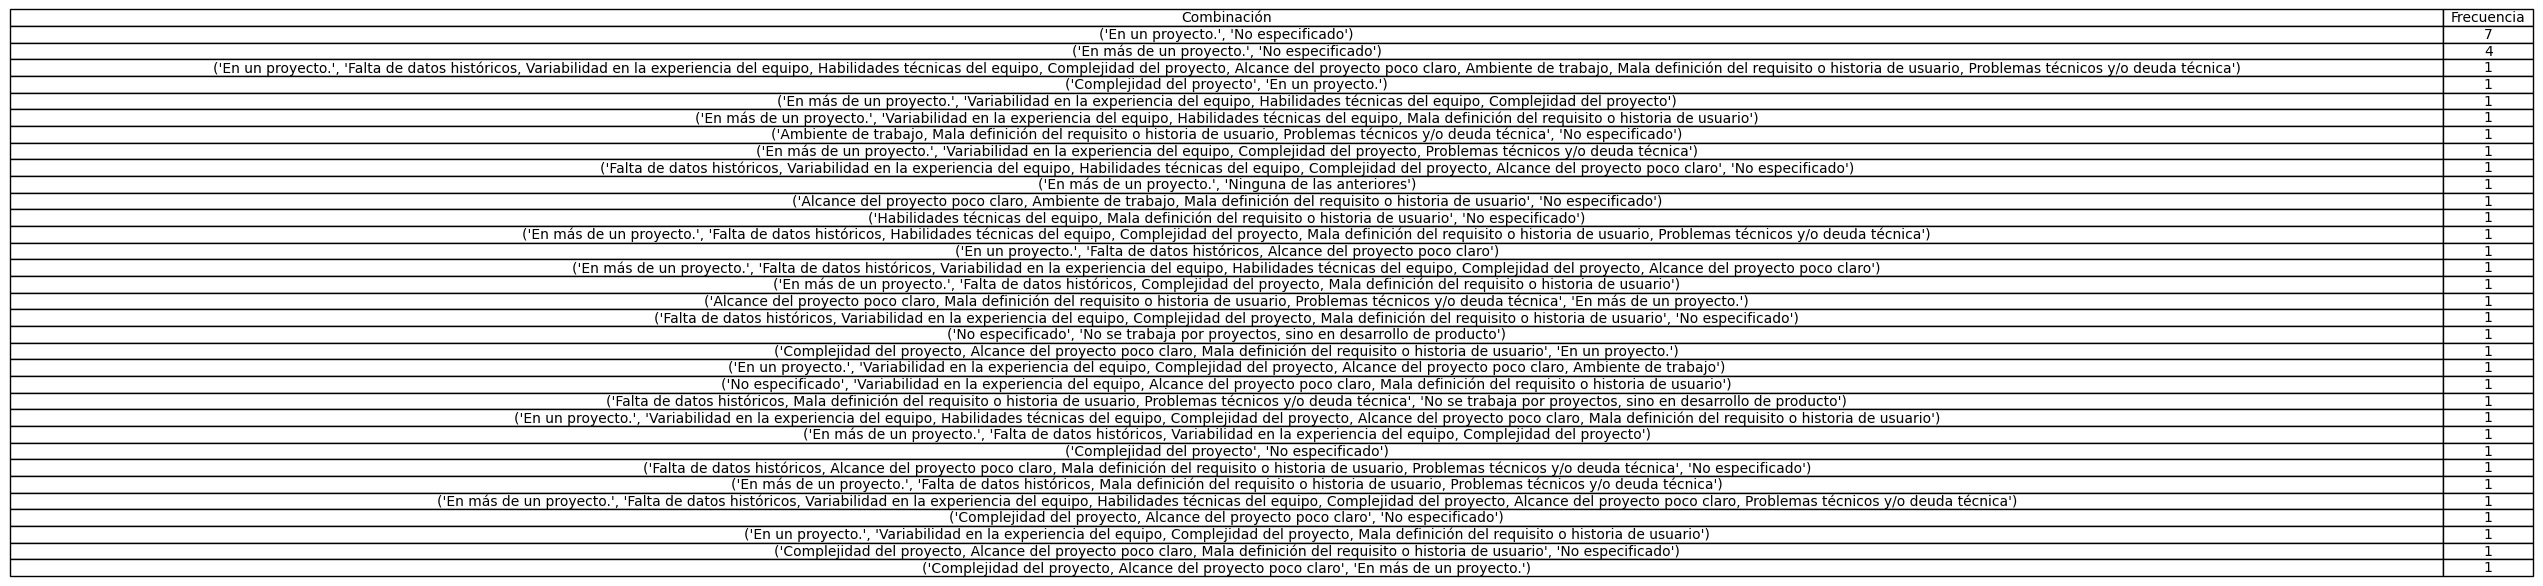

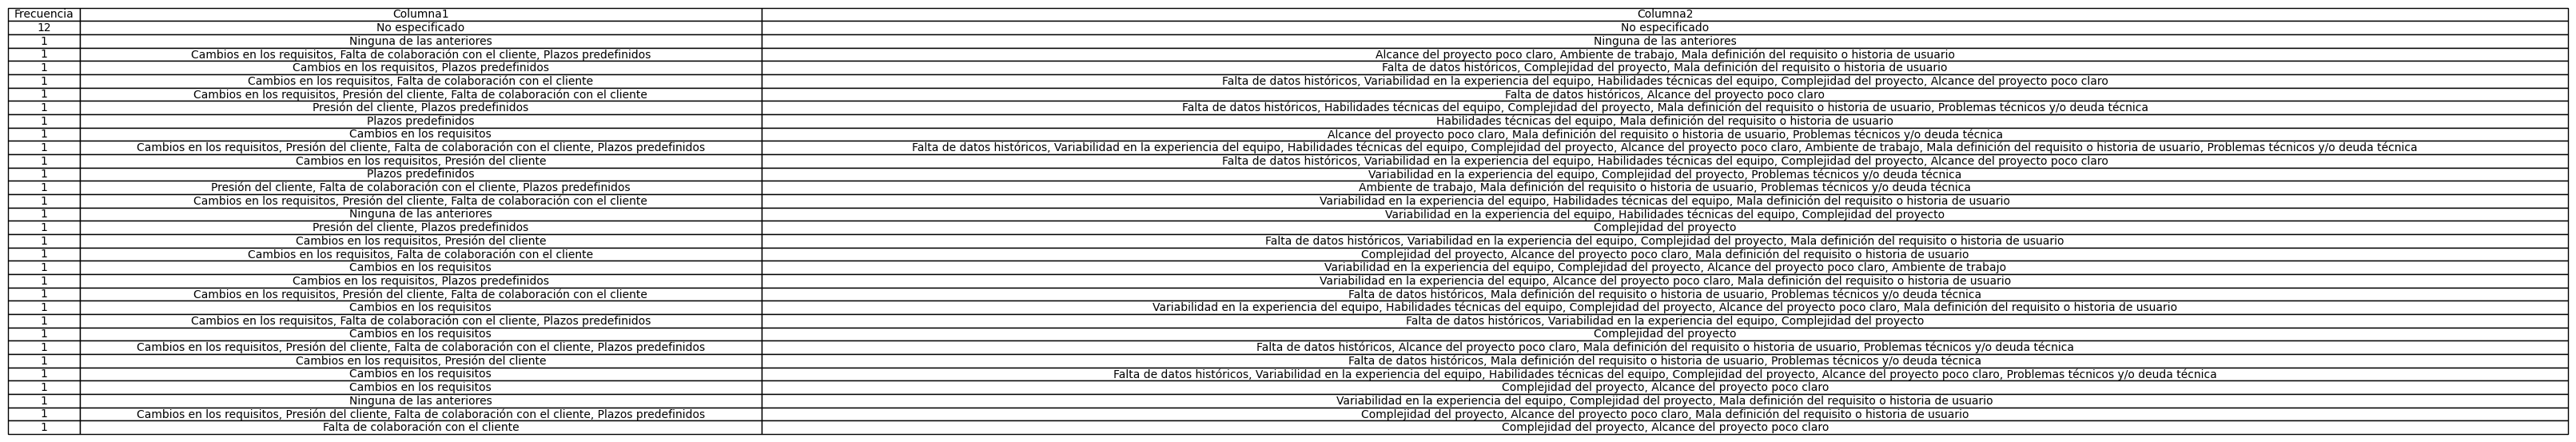

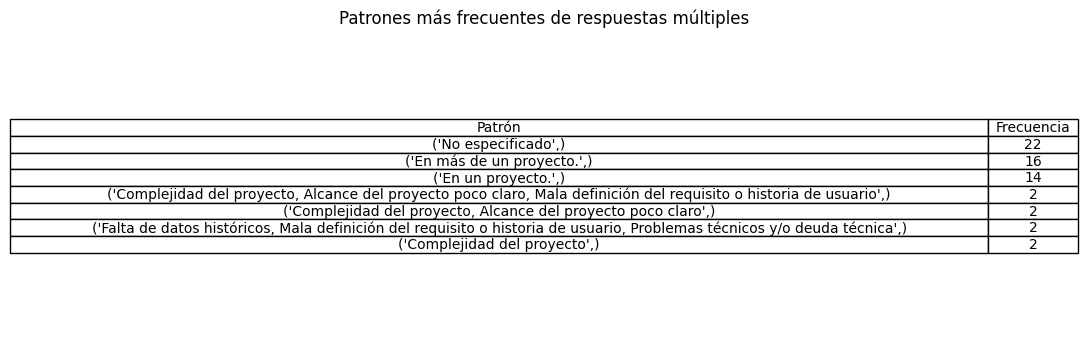

In [ ]:
output_dir2 = "resultadosbloque2"
os.makedirs(output_dir2, exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

columna1 = '***Actualmente, ¿En cuantos proyectos de desarrollo de software ágil trabaja?***'
columna2 = '¿Cuáles considera que son los principales factores internos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen)'


data['Respuestas_Multiples_Col2'] = data[columna2].str.split(';')


data['Combinaciones'] = data.apply(
    lambda row: tuple(sorted(
        set([str(row[columna1]).strip()]) | set(map(str.strip, row['Respuestas_Multiples_Col2'] or []))
    )) if pd.notnull(row[columna1]) and row['Respuestas_Multiples_Col2'] else None,
    axis=1
)


combinaciones_mult = Counter(data['Combinaciones'].dropna())


df_combinaciones = pd.DataFrame(
    combinaciones_mult.items(), columns=['Combinación', 'Frecuencia']
).sort_values(by='Frecuencia', ascending=False)


subconjuntos = []
for combinacion in data['Combinaciones'].dropna():
    if len(combinacion) >= 1:  
        subconjuntos.extend(combinations(combinacion, 1))


subconjuntos_contados = Counter(subconjuntos)


df_subconjuntos = pd.DataFrame(
    subconjuntos_contados.most_common(7),
    columns=['Patrón', 'Frecuencia']
)


if not df_combinaciones.empty:
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(
        cellText=df_combinaciones.values,
        colLabels=df_combinaciones.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_combinaciones.columns))))
    #plt.title("Combinaciones de respuestas múltiples más comunes")
    plt.show()
    df_combinaciones.to_excel(os.path.join(output_dir2, f"combinaciones_frecuentes_{timestamp}.xlsx"), index=False)


if not df_interacciones.empty:
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(
        cellText=df_interacciones.values,
        colLabels=df_interacciones.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_interacciones.columns))))
    #plt.title("Interacciones entre columna 1 y respuestas de columna 2")
    plt.show()
    df_interacciones.to_excel(os.path.join(output_dir2, f"interacciones_frecuentes_{timestamp}.xlsx"), index=False)


if not df_subconjuntos.empty:
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(
        cellText=df_subconjuntos.values,
        colLabels=df_subconjuntos.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_subconjuntos.columns))))
    plt.title("Patrones más frecuentes de respuestas múltiples")
    plt.show()
    df_subconjuntos.to_excel(os.path.join(output_dir2, f"patrones_frecuentes_{timestamp}.xlsx"), index=False)
else:
    print("No se encontraron patrones frecuentes con al menos 3 elementos.")


<div style="font-size: 40px; font-family: Verdana;">
    BLOQUE 3
</div>
</br>
</br>
<div style="font-size: 20px; font-family: Verdana;">
    Ninguna columna tiene valores multiples como resultado de la encuesta
</div>

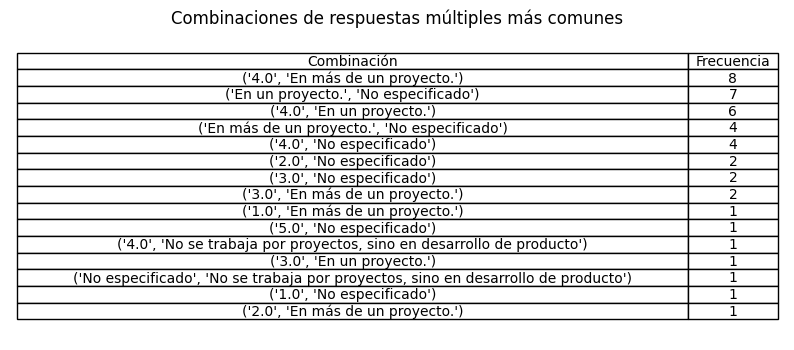

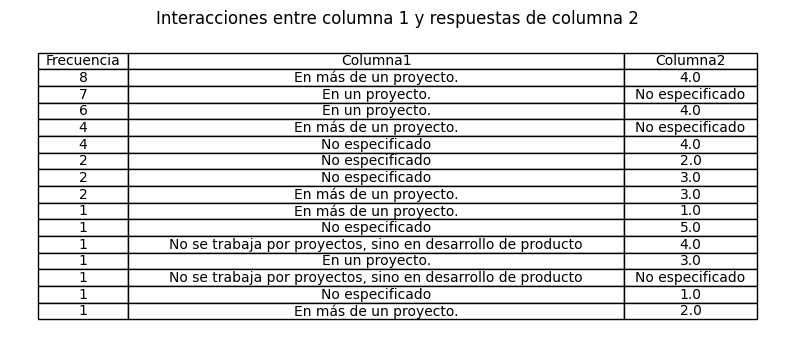

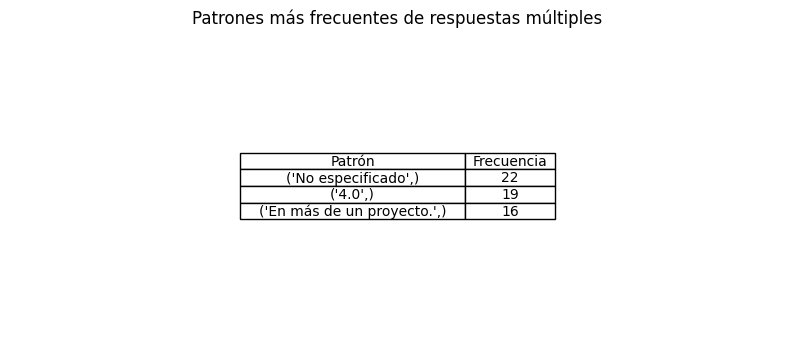

In [ ]:
output_dir3 = "resultadosbloque3"
os.makedirs(output_dir3, exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

columna1 = '***Actualmente, ¿En cuantos proyectos de desarrollo de software ágil trabaja?***'
columna2 = '¿Qué tan precisas considera que son las estimaciones de su equipo?'

data['Combinaciones'] = data.apply(
    lambda row: tuple(sorted(
        [str(row[columna1]).strip(), str(row[columna2]).strip()]
    )) if pd.notnull(row[columna1]) and pd.notnull(row[columna2]) else None,
    axis=1
)


combinaciones_mult = Counter(data['Combinaciones'].dropna())


df_combinaciones = pd.DataFrame(combinaciones_mult.items(), columns=['Combinación', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)


data['Interacciones'] = data.apply(
    lambda row: (str(row[columna1]).strip(), str(row[columna2]).strip())
    if pd.notnull(row[columna1]) and pd.notnull(row[columna2]) else None,
    axis=1
)


interacciones_contadas = Counter(data['Interacciones'].dropna())


df_interacciones = pd.DataFrame(interacciones_contadas.items(), columns=['Interacción', 'Frecuencia'])
df_interacciones[['Columna1', 'Columna2']] = pd.DataFrame(df_interacciones['Interacción'].tolist(), index=df_interacciones.index)
df_interacciones = df_interacciones.drop(columns=['Interacción']).sort_values(by='Frecuencia', ascending=False)


subconjuntos = []
for respuestas in data['Combinaciones']:
    if len(respuestas) >= 1:  
        subconjuntos.extend(combinations(sorted(set(respuestas)), 1))


subconjuntos_contados = Counter(subconjuntos)


df_subconjuntos = pd.DataFrame(
    subconjuntos_contados.most_common(3),
    columns=['Patrón', 'Frecuencia']
)


if not df_combinaciones.empty:
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(
        cellText=df_combinaciones.values,
        colLabels=df_combinaciones.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_combinaciones.columns))))
    plt.title("Combinaciones de respuestas múltiples más comunes")
    plt.show()
    df_combinaciones.to_excel(os.path.join(output_dir3, f"combinaciones_frecuentes_{timestamp}.xlsx"), index=False)


if not df_interacciones.empty:
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(
        cellText=df_interacciones.values,
        colLabels=df_interacciones.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_interacciones.columns))))
    plt.title("Interacciones entre columna 1 y respuestas de columna 2")
    plt.show()
    df_interacciones.to_excel(os.path.join(output_dir3, f"interacciones_frecuentes_{timestamp}.xlsx"), index=False)


if not df_subconjuntos.empty:
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(
        cellText=df_subconjuntos.values,
        colLabels=df_subconjuntos.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_subconjuntos.columns))))
    plt.title("Patrones más frecuentes de respuestas múltiples")
    plt.show()
    df_subconjuntos.to_excel(os.path.join(output_dir3, f"patrones_frecuentes_{timestamp}.xlsx"), index=False)
else:
    print("No se encontraron patrones frecuentes con al menos 3 elementos.")